# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [44]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [57]:
# Set the API base URL
api_key = "67fb5267275e206cd98f59fea6a66acb"
url = f"https://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=metric"
units = '&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()
#         pprint(weather_json)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | kupang
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | mahina
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | santa cruz
Processing Record 13 of Set 1 | gadzhiyevo
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | petropavlovsk-kamchatsky
Processing Record 17 of Set 1 | holualoa
Processing Record 18 of Set 1 | remire-montjoly
Processing Record 19 of Set 1 | salinopolis
Processing Record 20 of Set 1 | kidal
Processing Record 21 of Set 1 | miyako
Processing Record 22 of S

In [58]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

city_data

[{'City': 'kodiak',
  'Lat': 57.79,
  'Lng': -152.4072,
  'Max Temp': 279.88,
  'Humidity': 87,
  'Cloudiness': 100,
  'Wind Speed': 5.66,
  'Country': 'US',
  'Date': 1733817421},
 {'City': 'waitangi',
  'Lat': -43.9535,
  'Lng': -176.5597,
  'Max Temp': 288.61,
  'Humidity': 93,
  'Cloudiness': 4,
  'Wind Speed': 0.45,
  'Country': 'NZ',
  'Date': 1733817422},
 {'City': 'ilulissat',
  'Lat': 69.2167,
  'Lng': -51.1,
  'Max Temp': 269.16,
  'Humidity': 58,
  'Cloudiness': 100,
  'Wind Speed': 8.75,
  'Country': 'GL',
  'Date': 1733817422},
 {'City': 'puerto natales',
  'Lat': -51.7236,
  'Lng': -72.4875,
  'Max Temp': 278.06,
  'Humidity': 93,
  'Cloudiness': 100,
  'Wind Speed': 1.81,
  'Country': 'CL',
  'Date': 1733817422},
 {'City': 'kupang',
  'Lat': -10.1667,
  'Lng': 123.5833,
  'Max Temp': 301.47,
  'Humidity': 89,
  'Cloudiness': 75,
  'Wind Speed': 3.09,
  'Country': 'ID',
  'Date': 1733817422},
 {'City': 'punta arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 279.

In [59]:

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,279.88,87,100,5.66,US,1733817421
1,waitangi,-43.9535,-176.5597,288.61,93,4,0.45,NZ,1733817422
2,ilulissat,69.2167,-51.1000,269.16,58,100,8.75,GL,1733817422
3,puerto natales,-51.7236,-72.4875,278.06,93,100,1.81,CL,1733817422
4,kupang,-10.1667,123.5833,301.47,89,75,3.09,ID,1733817422


In [60]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [61]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,279.88,87,100,5.66,US,1733817421
1,waitangi,-43.9535,-176.5597,288.61,93,4,0.45,NZ,1733817422
2,ilulissat,69.2167,-51.1000,269.16,58,100,8.75,GL,1733817422
3,puerto natales,-51.7236,-72.4875,278.06,93,100,1.81,CL,1733817422
4,kupang,-10.1667,123.5833,301.47,89,75,3.09,ID,1733817422


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

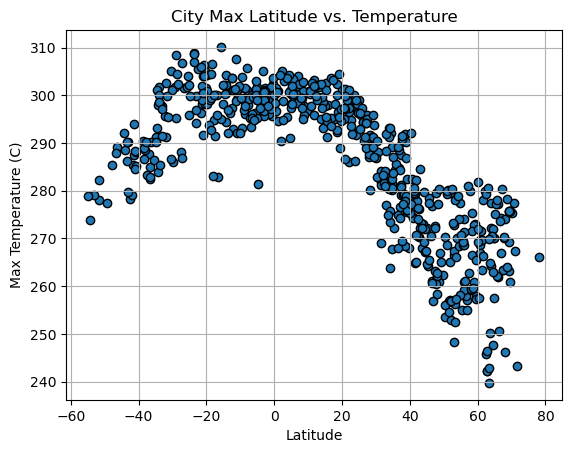

In [62]:
# Build scatter plot for latitude vs. temperature
x_ax = city_data_df['Lat']
y_ax = city_data_df['Max Temp']
plt.scatter(x_ax, y_ax, edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')
plt.grid()



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

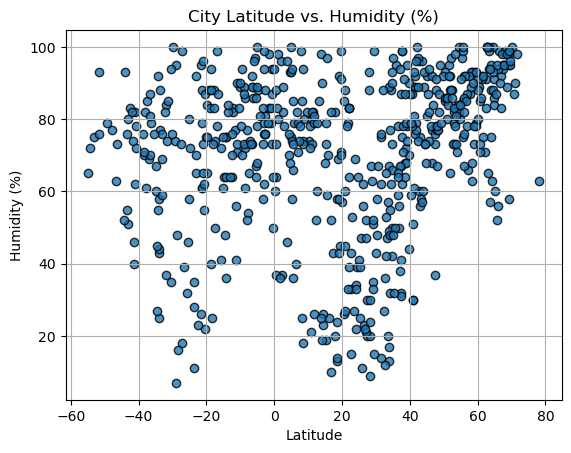

In [63]:
# Latitude Vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_data/Fig2.png")
plt.show()


#### Latitude Vs. Cloudiness

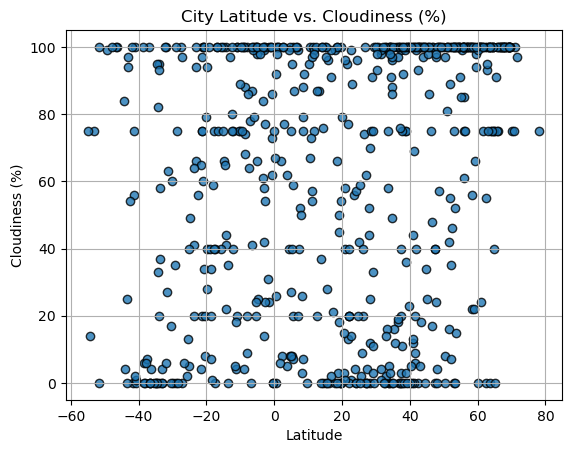

In [64]:
# Latitude Vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_data/Fig3.png")
plt.show()


#### Latitude vs. Wind Speed Plot

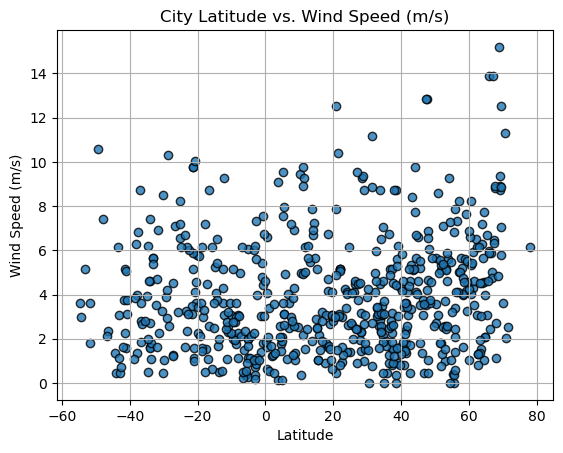

In [65]:
# Latitude Vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.savefig("output_data/Fig4.png")
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [66]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, hemisphere, variable, xlabel, ylabel):
    from scipy.stats import linregress


In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,279.88,87,100,5.66,US,1733817421
2,ilulissat,69.2167,-51.1000,269.16,58,100,8.75,GL,1733817422
6,bilibino,68.0546,166.4372,246.14,98,100,1.13,RU,1733817422
7,college,64.8569,-147.8028,270.14,86,75,2.06,US,1733817423
11,gadzhiyevo,69.2551,33.3362,275.72,99,100,9.36,RU,1733817375


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,288.61,93,4,0.45,NZ,1733817422
3,puerto natales,-51.7236,-72.4875,278.06,93,100,1.81,CL,1733817422
4,kupang,-10.1667,123.5833,301.47,89,75,3.09,ID,1733817422
5,punta arenas,-53.1500,-70.9167,279.21,75,75,5.14,CL,1733817422
8,mahina,-17.5065,-149.4890,300.02,74,0,1.54,PF,1733817423


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7171495100096802


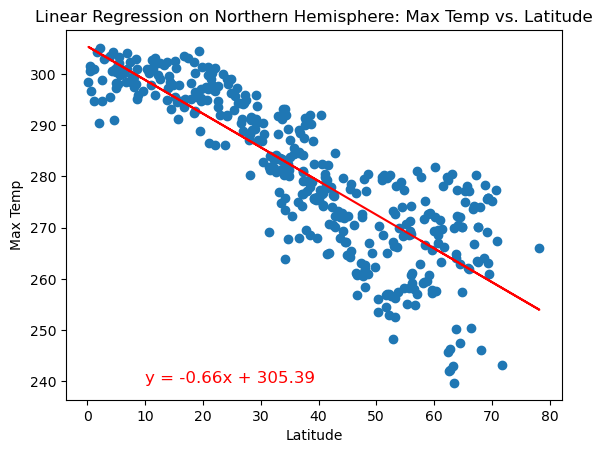

In [ ]:
# Linear regression on Northern Hemisphere
from scipy.stats import linregress

# Extract relevant data for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define the regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Linear Regression on Northern Hemisphere: Max Temp vs. Latitude")
plt.annotate(line_eq, (10, y_values.min()), fontsize=12, color="red")

# Display r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()


The r^2-value is: 0.3461820353809897


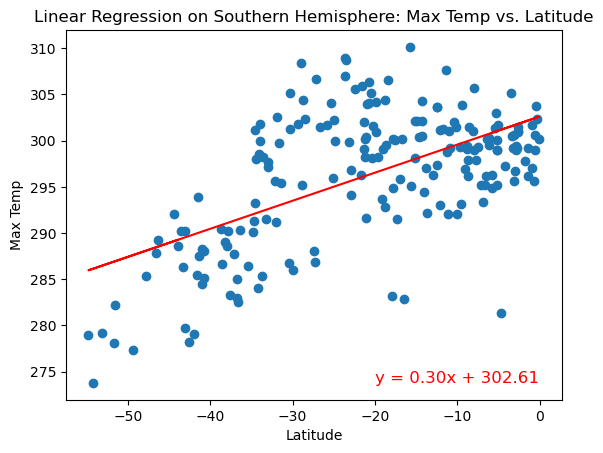

In [70]:
# Linear regression on Southern Hemisphere


# Extract relevant data for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define the regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Linear Regression on Southern Hemisphere: Max Temp vs. Latitude")
plt.annotate(line_eq, (x_values.max() - 20, y_values.min()), fontsize=12, color="red")

# Display r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.15918980995426635


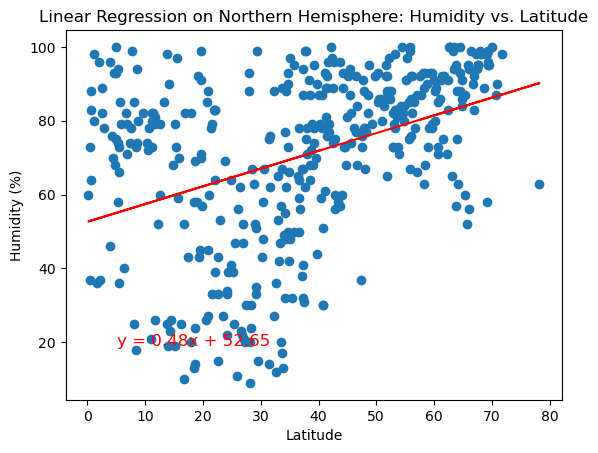

In [71]:
# Northern Hemisphere
# YOUR CODE HERE

# Extract relevant data for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define the regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Linear Regression on Northern Hemisphere: Humidity vs. Latitude")
plt.annotate(line_eq, (x_values.min() + 5, y_values.min() + 10), fontsize=12, color="red")

# Display r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()


The r^2-value is: 0.03953547591956323


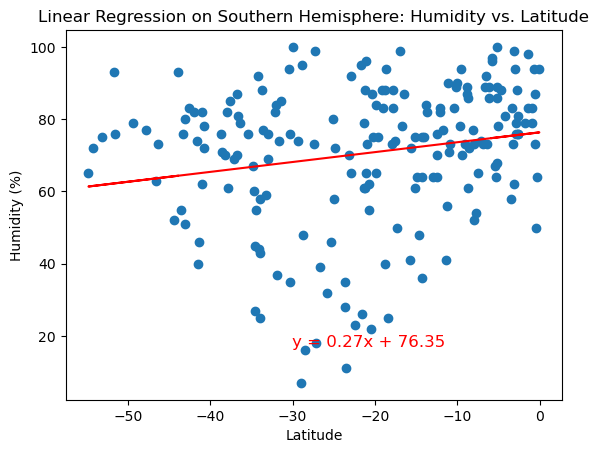

In [72]:
# Southern Hemisphere
# YOUR CODE HERE

# Extract relevant data for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define the regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Linear Regression on Southern Hemisphere: Humidity vs. Latitude")
plt.annotate(line_eq, (x_values.max() - 30, y_values.min() + 10), fontsize=12, color="red")

# Display r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.08270701433919392


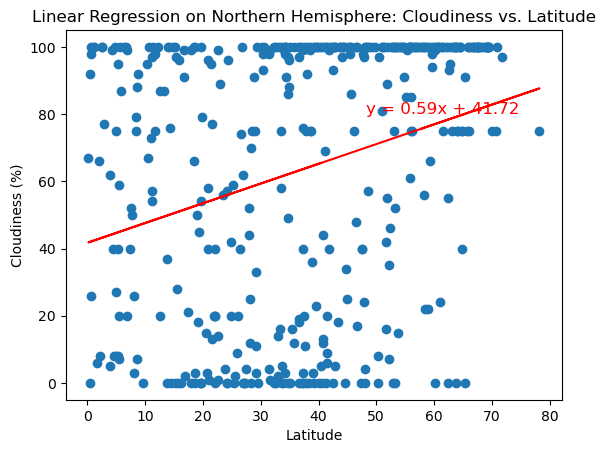

In [73]:
# Northern Hemisphere
# YOUR CODE HERE

# Extract relevant data for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define the regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Linear Regression on Northern Hemisphere: Cloudiness vs. Latitude")
plt.annotate(line_eq, (x_values.max() - 30, y_values.max() - 20), fontsize=12, color="red")

# Display r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()


The r^2-value is: 0.018616831531634456


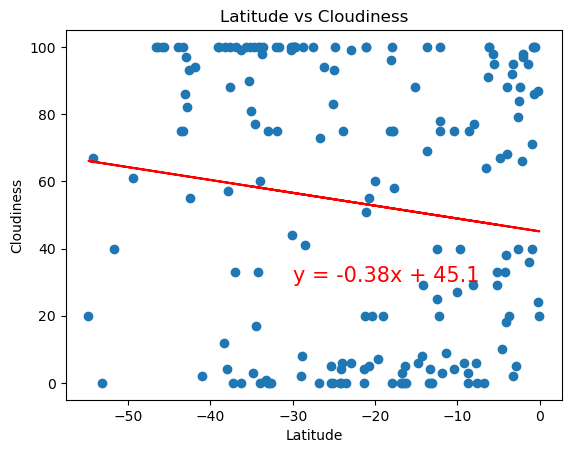

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.046257606135460115


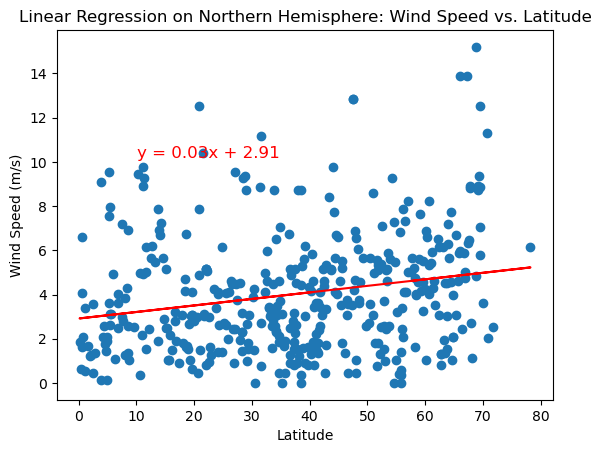

In [74]:
# Northern Hemisphere
# YOUR CODE HERE

# Extract relevant data for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define the regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Linear Regression on Northern Hemisphere: Wind Speed vs. Latitude")
plt.annotate(line_eq, (x_values.min() + 10, y_values.max() - 5), fontsize=12, color="red")

# Display r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()


The r^2-value is: 0.015320806000369825


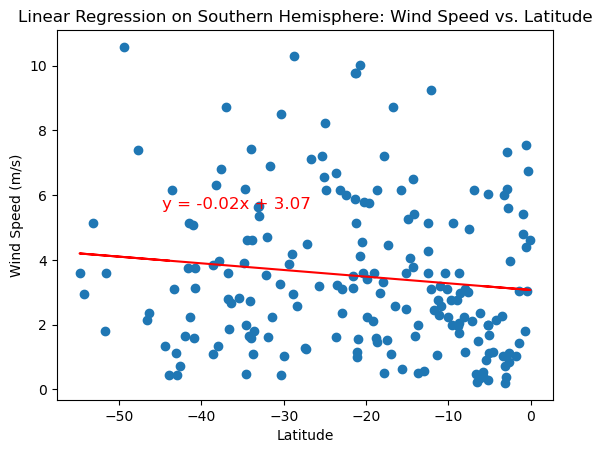

In [75]:
# Southern Hemisphere
# YOUR CODE HERE

# Extract relevant data for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define the regression line
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Linear Regression on Southern Hemisphere: Wind Speed vs. Latitude")
plt.annotate(line_eq, (x_values.min() + 10, y_values.max() - 5), fontsize=12, color="red")

# Display r-squared value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE